In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
#Inspect data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
#Using inspector print the column names 
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Use `engine.execute` to select and display the first 5 rows from the measurement table
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
# # Find the most recent date in the data set.
   
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23')

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
last_twelve_months = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >='2016-08-23').filter(Measurement.date <='2017-08-23').order_by(Measurement.date).group_by(Measurement.date).all()
last_twelve_months

# Starting from the most recent data point in the database. 








[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [59]:
# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
year_ago_date


datetime.date(2016, 8, 23)

In [64]:
# Perform a query to retrieve the data and precipitation scores

prcp_scores = session.query(Measurement.date, Measurement.prcp).all()
prcp_scores


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_scores, columns = ['date', 'prcp'])
prcp_df.set_index(prcp_df['date'], inplace = True)
prcp_df.head()



,date,prcp
date,,
2010-01-01,2010-01-01,0.08
2010-01-02,2010-01-02,0.00
2010-01-03,2010-01-03,0.00
2010-01-04,2010-01-04,0.00
2010-01-06,2010-01-06,NaN


In [70]:
# Sort the dataframe by date
sorted_df = prcp_df.sort_index()
sorted_df


,date,prcp
date,,
2010-01-01,2010-01-01,0.08
2010-01-01,2010-01-01,0.21
2010-01-01,2010-01-01,0.15
2010-01-01,2010-01-01,0.15
2010-01-01,2010-01-01,0.05
...,...,...
2017-08-22,2017-08-22,0.50
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


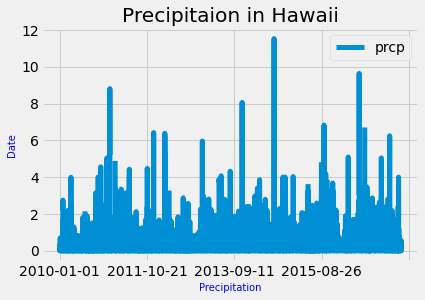

In [72]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(linewidth=5, alpha = 1)
plt.ylabel('Date', fontsize = 10, color = 'blue')
plt.xlabel('Precipitation', fontsize = 10, color = 'blue')
plt.title('Precipitaion in Hawaii')
plt.show()

# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(func.count(Station.station)).all()
num_stations

[(9)]

In [82]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs = [Measurement.station,
                   func.min(Measurement.tobs),
                   func.max(Measurement.tobs),
                   func.avg(Measurement.tobs)]



In [96]:
most_active_stations = (session.query(*tobs)
                       .filter(Measurement.station =='USC00519281')
                       .all())

most_active_stations_temp= pd.DataFrame(most_active_stations, columns = ['stations','min_temp', 'max_temp', 'avg_temp'])
most_active_stations_temp.set_index('stations', inplace= True)
most_active_stations_temp

,min_temp,max_temp,avg_temp
stations,,,
USC00519281,54.0,85.0,71.663781


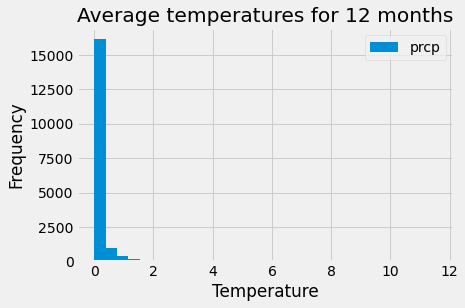

In [102]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histoplot = sorted_df.plot.hist(bins =30)
plt.title("Average temperatures for 12 months")
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.show()



# Close session

In [103]:
# Close Session
session.close()